In [45]:
from sstcam_simulation.utils.sipm import SiPMSpecification
from sstcam_simulation.data import get_data
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Text(0, 0.5, 'OCT & PDE')

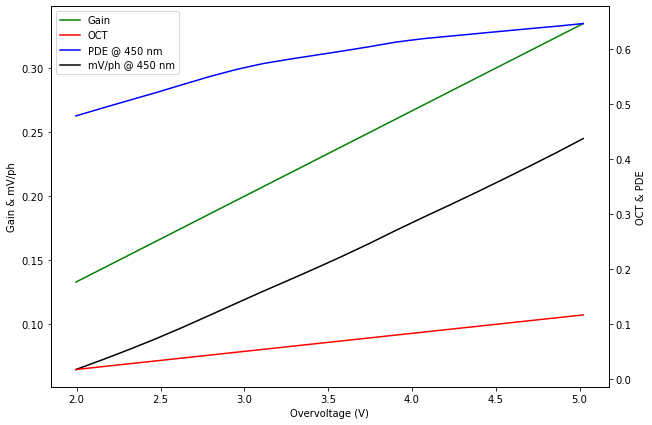

In [59]:
sipm = SiPMSpecification.from_csv(get_data("datasheet/hamamatsu_S14521-8648_bare.txt"))
optimal_overvoltage = 4.5  # V
gain_at_optimal = 0.3  # mV per f.c.
opct_at_optimal = 0.1
sipm.scale_gain(optimal_overvoltage, gain_at_optimal)
sipm.scale_opct(optimal_overvoltage, opct_at_optimal)

overvoltage = np.linspace(sipm._overvoltage_array.min(), sipm._overvoltage_array.max(), 20)
gain = np.interp(overvoltage, sipm._overvoltage_array, sipm._gain_array)
opct = np.interp(overvoltage, sipm._overvoltage_array, sipm._opct_array)
pde = np.interp(overvoltage, sipm._overvoltage_array, sipm._pde_array)

fc_per_pe = 1/(1 - opct)
mv_per_pe = gain * fc_per_pe
mv_per_ph = mv_per_pe * pde

fig, ax_gain = plt.subplots(figsize=(10, 7))
ax_percent = ax_gain.twinx()

l_gain = ax_gain.plot(overvoltage, gain, color="green", label="Gain")
l_opct = ax_percent.plot(overvoltage, opct, color="red", label="OCT")
l_pde = ax_percent.plot(overvoltage, pde, color="blue", label="PDE @ 450 nm")
l_mvperph = ax_gain.plot(overvoltage, mv_per_ph, color="black", label="mV/ph @ 450 nm")

lns = l_gain + l_opct + l_pde + l_mvperph
labs = [l.get_label() for l in lns]
ax_gain.legend(lns, labs, loc='best', fontsize=10)

ax_gain.set_xlabel("Overvoltage (V)")
ax_gain.set_ylabel("Gain & mV/ph")
ax_percent.set_ylabel("OCT & PDE")

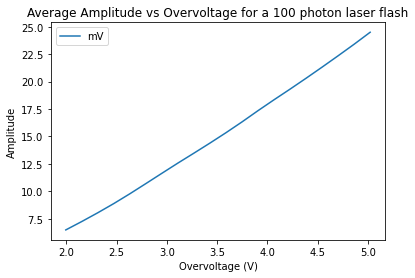

In [61]:
amplitude = 100  # photons @ 450nm
amplitude_std = np.sqrt(amplitude)
amplitude_mv = amplitude * mv_per_ph
amplitude_mv_std = amplitude_std * mv_per_ph
amplitude_pe = amplitude * pde
amplitude_pe_std = amplitude_std * pde

plt.plot(overvoltage, amplitude_mv, label="mV")
#plt.plot(overvoltage, amplitude_pe, label="p.e.")
plt.xlabel("Overvoltage (V)")
plt.ylabel("Amplitude")
plt.title(f"Average Amplitude vs Overvoltage for a {amplitude} photon laser flash")
plt.legend()

In [46]:
np.sqrt(7)

2.6457513110645907